# Hebben migranten een slechte invloed op de Nederlandse samenleving?

### Data story informatievisualisatie

* Mert Cincil - 13937863
* Kerem Comertpay - 14006502
* Roman van Eldijk - 14527685

In [2]:
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Introductie

Ons Data Story gaat over correlatie tussen het groeiende aantal migranten in Nederland en de welvaart van Nederland. Hierbij nemen we diverse economische indicatoren in beschouwing, met bijzondere aandacht voor de gemiddelde inkomsten als een maatstaf voor de algemene welvaart. 

Daarnaast gaan we verder door een tweede correlatie te onderzoeken: die tussen de groei van het aantal migranten en de criminaliteitscijfers in Nederland. De vraag rijst of er een directe link is tussen de toename van de migrantenpopulatie en een mogelijke stijging van de criminaliteit. Het is belangrijk om te benadrukken dat we geen vooraf bepaalde conclusies trekken, maar eerder streven naar een objectieve analyse van de beschikbare gegevens om eventuele patronen of trends te identificeren.

We willen dit onderzoeken omdat het grote maatschappelijke relevantie heeft. Het is handig om mogelijke correlaties tussen migrantenpopulaties en criminaliteitscijfers te begrijpen. Dit kan namelijk informeren over beleid en praktijken met betrekking tot immigratie, integratie, veiligheid en sociaal welzijn

Indien er een positieve correlatie wordt vastgesteld, is het essentieel om de onderliggende factoren te begrijpen. Het kan bijvoorbeeld zijn dat factoren zoals sociaaleconomische omstandigheden, de ervaring van discriminatie, gebrek aan toegang tot onderwijs en werkgelegenheid, of andere structurele ongelijkheden bijdragen aan een hogere criminaliteitsgraad onder sommige migrantengroepen.

Dergelijk inzicht zou kunnen leiden tot beleid dat zich richt op het verminderen van dergelijke ongelijkheden en het verbeteren van de integratie en inclusie van migranten. Hierdoor zou de criminaliteit kunnen dalen, en de sociale samengang en het algehele welzijn in de samenleving kunnen toenemen.

Aan de andere kant, als er geen correlatie wordt gevonden, kan dit helpen bij het bestrijden van stereotype beelden en vooroordelen over migranten als een bron van criminaliteit. Het kan bijdragen aan een meer feitelijk gebaseerde dialoog en een rechtvaardiger beleid ten aanzien van migranten.

In beide gevallen draagt het onderzoek bij aan het bevorderen van een geïnformeerde, feitelijk correcte discussie over migratie en criminaliteit, wat uiteindelijk bijdraagt aan een rechtvaardiger, eerijker en veiliger samenleving.

Voor ons onderzoek maken we gebruik van vijf specifieke datasets. De eerste dataset omvat gegevens over het aantal migranten dat vanaf het begin van de registratie tot en met het jaar 2022 naar Nederland is gekomen. De tweede dataset biedt inzicht in de gemiddelde inkomens in Nederland tot en met het jaar 2022, waardoor we een solide basis hebben om de economische impact te beoordelen. De derde dataset, betreft geregistreerde verdachten van criminele activiteiten die een migratieachtergrond hebben. Daarnaast hebben we nog een dataset met onveiligheidsgevoel van Nederlandse inwoners. Verder hebben we een dataset met de migratieredenen van migranten in Nederland. Tenslotte hebben gebruiken wij een dataset met de bbp van Denemarken en Nederland. Deze gegevens stellen ons in staat om eventuele correlaties tussen migratie, criminaliteit en welvaart te onderzoeken.




# Preprocessing


**Immigranten naar nederland**

Cijfers van het cbs die het aantal inkomende immigranten (x1000) per jaar laat zien. De originele dataset liet ook migratiesaldo en emigratie zien, maar deze hebben wij niet gebruikt omdat het geen toegevoegde waarde heeft voor het beantwoorden van de onderzoeksvraag.

Bron: https://www.cbs.nl/nl-nl/dossier/dossier-asiel-migratie-en-integratie/hoeveel-immigranten-komen-naar-nederland
 

In [3]:
migratie = pd.read_csv('migratie_nederland.csv')
# De data is een verkeerde format  gedownload waarbij de kolom namen niet overeenkwamen met de daadwerkelijke kolommen
# Alleen de eerste twee kolommen waren nodig (jaar en immigratie). De andere kolommen hebben we er dus uitgehaald
migratie_processed = migratie[['Jaar;Immigratie;Emigratie;Migratiesaldo', 'New Split Column']]

# De kolom namen hebben we aangepast zodat deze makkelijk af te lezen konden worden
migratie_processed = migratie_processed.rename(columns={'Jaar;Immigratie;Emigratie;Migratiesaldo': 'jaar',
                                'New Split Column': 'immigranten'})

display(migratie_processed.head())


,jaar,immigranten
0,2002,121
1,2003,104
2,2004,94
3,2005,92
4,2006,101


**Geregistreerde verdachten**

Cijfers van het cbs die het aantal geregistreerde verdachten laat zien en hun bijbehorende achtergrond. 

De data was veel uitgebreider met afkomst uit alle landen en of de verdachten 1e of 2e generatie migratieachtergrond hadden. Om de data bruikbaar te maken, is de dataset gedownload met de juiste delimeter om ervoor te zorgen dat het in het juiste formaat werd opgeslagen.

Na het downloaden van de data, merkten we op dat de kolomnamen niet correct waren. Om dit te corrigeren, hebben we de kolomnamen aangepast. Hierdoor konden we de gegevens op een gestructureerde manier analyseren en presenteren.

De jaartallen zijn gerangschikt in kolommen, terwijl de rijen de verschillende categorieën verdachten vertegenwoordigen. Dit kwam niet overeen met de structuur die nodig was, om de rijen naar kolommen en kolommen naar rijen te krijgen is de dataframe getransponeerd. 



Bron: https://www.cbs.nl/nl-nl/cijfers/detail/81959NED?q=geregistreerde%20verdachten 

In [4]:
# Sidenote: de data was veel uitgebreider met afkomst uit alle landen en of de verdachten 1e of 2e generatie migratieachtergrond hebben. Echter, hebben wij via de site van het cbs de data iets aangepast zodat we de data makkelijk konden transformeren en gebruiken bij visualisaties.

# Download de data met de juiste delimeter zodat we niet een verkeerd format krijgen
verdachten = pd.read_csv('verdachten_met_migratie_achtergrond_nederland.csv', delimiter=';', header=0)

# De kolom namen waren weer verkeerd dus hebben we de namen van de eerste row (Perioden) gebruikt als kolomnamen 
verdachten.columns = verdachten.iloc[0]

# De eerste row (Perioden hadden we nu niet meer nodig omdat deze al in de kolom namen staan)
verdachten = verdachten[1:]

# De rijen zijn het totaal aantal verdachten, verdachten met nederlandse achtergrond en verdachten met migratieachtergrond. Op de kolommen staan de jaartallen.
display(verdachten.head()) 

,Perioden,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021*,2022*
1,Totaal,252180,234230,219240,200400,186910,172550,165960,167850,156200,146210,158290
2,Nederlandse achtergrond,136120,124500,116950,104810,96160,88120,83140,82340,74610,70300,72890
3,Met migratieachtergrond,114680,108930,101670,94950,90220,83760,82010,84590,80950,75370,84520


In [5]:
# Aangezien we de jaartallen op de rijen willen hebben we het dataframe omgedraaid
verdachten.set_index('Perioden', inplace=True)
verdachten.index.name = 'Jaar'
verdachten = verdachten.T
verdachten = verdachten.astype(int)
display(verdachten.head())

Jaar,Totaal,Nederlandse achtergrond,Met migratieachtergrond
0,,,
2012,252180,136120,114680
2013,234230,124500,108930
2014,219240,116950,101670
2015,200400,104810,94950
2016,186910,96160,90220


**Inkomstenbron van immigranten die in 2016 naar Nederland zijn gekomen**

Cijfers van het cbs die laten zien hoe immigranten die in 2016 naar Nederland komen zich in de toekomende 5 jaar van inkomsten voorzien. De eerste kolom is gepreprocessed naar de index van de dataframe om zo de jaren als index te krijgen. Verder zijn de waardes van de dataframe omgezet naar integers. 

Bron: https://www.cbs.nl/nl-nl/dossier/dossier-asiel-migratie-en-integratie/hoeveel-immigranten-komen-naar-nederland

In [6]:
inkomsten_immigranten = pd.read_csv('aankomst-2016.csv', delimiter=';')
# De eerste kolom veranderen naar de index
inkomsten_immigranten = inkomsten_immigranten.set_index('Jaar na aankomst')

# Naam aanpassen
inkomsten_immigranten.index.name = 'Jaar'
# Values veranderen zodat er mee gerekend kan worden
inkomsten_immigranten = inkomsten_immigranten.replace(' ', '', regex=True).astype(int)
display(inkomsten_immigranten)

,Werknemer en zelfstandige,Uitkerings- en pensioenontvanger,(School)kind of student,Overige (zonder inkomen)
Jaar,,,,
1,11285,18660,20125,15620
2,11660,18755,18360,10230
3,13915,15525,17150,8005
4,16855,12035,16215,6880
5,17455,11665,15170,5685


**Onveiligheids gevoel van Nederlanders**

Cijfers van het cbs over het onveiligheidsgevoel van Nederlanders over een periode van 2012 tot 2019. De dateset zien er onoverzichtelijk uit. Op de rijen staan verschillende situaties waarin mensen zich onveilig voelen en op de kolommen staan de jaren. Van dataset wordt alleen gebruik gemaakt van de eerste rij waarin wordt gevraagd of mensen zich over het algemeen wel eens onveilig voelen. De value is het percentage mensen dat zich wel eens onveilig voelt. Om met de waardes te rekenen zijn de komma's omgezet naar punten en zijn de values omgezet naar floats.


Bron: https://www.cbs.nl/nl-nl/cijfers/detail/81877NED

In [21]:
onveilig = pd.read_csv('onveilig_gevoel.csv', delimiter=';')
display(onveilig.head(10))
# De dateset zien er nu heel onoverzichtelijk uit. Op de rijen staan verschillende situaties waarin mensen zich onveilig voelen en op de kolommen staan de jaren. In onze data story gebruiken we alleen de eerste rij waarin wordt gevraagd of mensen zich over het algemeen wel eens onveilig voelen.
# De value is het percentage mensen dat zich wel eens onveilig voelt. 

onveilig = pd.DataFrame(onveilig)
# De jaartallen op de kolommen
onveilig.columns = onveilig.iloc[0]
# Eerste rij hebben we niet meer nodig
onveilig = onveilig[1:]
# Aangezien we alleen de rij gebruiken die gaat over of mensen zich over het algemeen wel eens onveilig voelen, gebruiken we alleen de tweede rij
onveilig = onveilig.iloc[0]
# Op de eerste twee rijen staan nu Onderwerp en Perioden en deze hebben we niet nodig om een grafiek te maken
onveilig = onveilig.iloc[2:]
# Om er mee te rekenen hebben we de komma's vervangen met punten
onveilig = onveilig.str.replace(",", ".")
# De values moeten floats zijn
onveilig = onveilig.astype(float)
display(onveilig)

,(On)veiligheidsbeleving; regio (2012-2019),Column 02,Column 03,Column 04,Column 05,Column 06,Column 07,Column 08,Column 09
0,Onderwerp,Perioden,2012,2013,2014,2015,2016,2017,2019
1,(On)veiligheidsbeleving |Algemeen|Onveiligheid...,%,"36,6","36,7","35,9","35,6","34,7","34,1","31,8"
2,(On)veiligheidsbeleving |Algemeen|Onveiligheid...,%,"1,8","1,9","1,8","1,7","1,6","1,6","1,4"
3,(On)veiligheidsbeleving |Algemeen|Kans om slac...,% '(heel) groot',"3,9","5,1","3,9","3,8","3,2","3,1","2,6"
4,(On)veiligheidsbeleving |Algemeen|Kans om slac...,% '(heel) groot',"2,7","2,9","2,5","2,5","2,1","1,9","1,7"
5,(On)veiligheidsbeleving |Algemeen|Kans om slac...,% '(heel) groot',"10,2","12,1","11,0","10,9","9,2","9,0","7,8"
6,(On)veiligheidsbeleving |Algemeen|Kans om slac...,% '(heel) groot',"2,4","2,5","2,3","2,5","2,2","2,2","1,9"
7,(On)veiligheidsbeleving |Buurt|Onveiligheidsge...,%,"18,0","18,8","18,2","18,1","16,4","16,4","14,4"
8,(On)veiligheidsbeleving |Buurt|Onveiligheidsge...,%,"1,7","1,8","1,8","1,7","1,5","1,5","1,4"
9,(On)veiligheidsbeleving |Buurt|Onveiligheidsge...,% komt vaak voor,"3,7","3,6","3,5","3,5","3,1","3,2","2,9"


0
2012    36.6
2013    36.7
2014    35.9
2015    35.6
2016    34.7
2017    34.1
2019    31.8
Name: 1, dtype: float64

**Migratiereden voor migranten over een lange periode**

Cijfers van het cbs die laten zien wat de reden is voor migranten om naar Nederland te komen

Bron: https://www.cbs.nl/nl-nl/nieuws/2017/27/gezin-nog-steeds-belangrijkste-reden-voor-immigratie

In [8]:
reden = pd.read_csv("migratie_reden.csv", sep=",")

# Kies de meest recente data
laatste_data = reden.loc[reden.iloc[:, 0] == reden.iloc[:, 0].max(), ['Asiel', 'Arbeid', 'Gezin', 'Studie']].squeeze()
display(laatste_data)

Asiel     26960
Arbeid    30540
Gezin     51920
Studie    19805
Name: 16, dtype: int64

**Combinatie van immigranten naar Nederland en de inkomstenbron van migranten vanaf 2016**

Dit is een combinatie van twee datasets die eerder in preprocessing is gebruikt. De kolom met de jaren is als index gezet en de kolom namen zijn aangepast zodat de twee datasets samengevoegd konden worden. Ook zijn de types van de waardes omgezet naar integers.

Bronnen: https://www.cbs.nl/nl-nl/dossier/dossier-asiel-migratie-en-integratie/hoeveel-immigranten-komen-naar-nederland & https://www.cbs.nl/nl-nl/dossier/dossier-asiel-migratie-en-integratie/hoeveel-immigranten-komen-naar-nederland


In [9]:
#TOTAAL IMMIGRATIE X INKOMSTEN 2016
TxI = migratie[['Jaar;Immigratie;Emigratie;Migratiesaldo', 'New Split Column']]
TxI = TxI.rename(columns={'Jaar;Immigratie;Emigratie;Migratiesaldo': 'Jaar',
                                'New Split Column': 'immigranten'})
TxI = TxI.set_index('Jaar')
TxI = TxI.loc['2012':]
TxI.rename(index={'2022*': 2022}, inplace=True)

# Pas de naam aan van het jaar om het de joinen met de andere dataset
verdachten.rename(index={'2021*': 2021,'2022*': 2022}, inplace=True)
# Verander de type van de jaren
a = TxI.index
a = a.astype('int64')
TxI.index = a
TxI = TxI['immigranten'].mul(1000, axis = 0)

# Voeg de datasets samen
result = pd.concat([TxI, verdachten], axis=1, join="inner")

display(result)

,immigranten,Totaal,Nederlandse achtergrond,Met migratieachtergrond
2012,158000,252180,136120,114680
2013,164000,234230,124500,108930
2014,182000,219240,116950,101670
2015,204000,200400,104810,94950
2016,230000,186910,96160,90220
2017,234000,172550,88120,83760
2018,243000,165960,83140,82010
2019,269000,167850,82340,84590
2020,220000,156200,74610,80950
2021,252000,146210,70300,75370


**Het BBP van Nederland en Denemarken van de afgelopen jaren**


Bronnen: 'https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv'


In [22]:
data_url = 'https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv'

df = pd.read_csv(data_url)

denmark_df = df[df['Country Name'] == 'Denmark']
netherlands_df = df[df['Country Name'] == 'Netherlands']

years = [2019, 2020, 2021, 2022]
denmark_gdp_values = [346500000000.06, 355220000000.01, 398300000000.09]
netherlands_gdp_values = [910190000000.04, 909790000000.03, 1012850000000.01]

denmark_data = [{'Country Name': 'Denmark', 'Year': year, 'Value': denmark_gdp} for year, denmark_gdp in zip(years, denmark_gdp_values)]
netherlands_data = [{'Country Name': 'Netherlands', 'Year': year, 'Value': netherlands_gdp} for year, netherlands_gdp in zip(years, netherlands_gdp_values)]

denmark_df = pd.concat([denmark_df, pd.DataFrame(denmark_data)], ignore_index=True)
netherlands_df = pd.concat([netherlands_df, pd.DataFrame(netherlands_data)], ignore_index=True)


denmark_df = denmark_df[denmark_df['Year'] >= 2004]
netherlands_df = netherlands_df[netherlands_df['Year'] >= 2004]

# *Graphs*

### Figuur 1
Figuur 1 toont het totale aantal immigranten dat naar Nederland komt over een periode van 20 jaar, waarbij de x-as de jaren en de y-as het aantal immigranten (x1000) weergeven. De lijn is een stijgende lijn gedurende de jaren, wat wijst op een toenemende immigratie naar Nederland. In 2022 is er te zien dat er een significante toename is ten opzichte van het jaar daarvoor (2021).

In [11]:
trace = go.Bar(
    x = migratie_processed['jaar'],
    y = migratie_processed['immigranten'],
    # marker=dict(color='#89375F')
    marker=dict(color=migratie_processed['immigranten'], colorscale='Reds')
)
fig = go.Figure(trace)
fig.update_layout(
    xaxis_title='Jaar',
    yaxis_title='Aantal migranten naar Nederland (x1000)',
    title='Aantal immigranten die per jaar naar Nederland komen',
    plot_bgcolor='rgb(80, 80, 80)',
    paper_bgcolor='rgb(30, 30, 30)',
    font=dict(
        family='Courier New',
        color='white'),
    xaxis=dict(
        tickangle=45
    )
)
fig.show()

### Figuur 2

Figuur 2 laat zien dat het totaal aantal verdachten van misdrijven in Nederland jaarlijks afneemt. Hoewel dit ook geldt voor de verdachten met een Nederlandse achtergrond en verdachten met migratieachtergrond is er te zien dat de verdachten met een migratie achtergrond de verdachten met een Nederlandse achtergrond inhalen vanaf 2019.

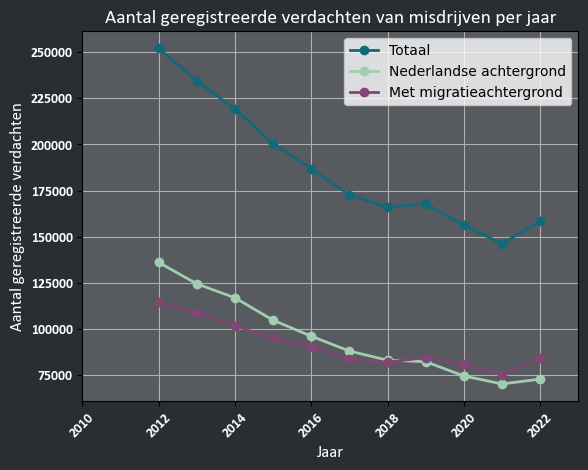

In [12]:
colors = ['#116A7B', '#A2CDB0', '#804674', '#A7CF5D']

verdachten.plot(kind='line', marker='o', color=colors, linewidth=2, markersize=6)

plt.xlabel('Jaar', fontsize=12, fontname='Calibri', color='white')
plt.ylabel('Aantal geregistreerde verdachten', fontsize=12, fontname='Calibri', color='white')
plt.title('Aantal geregistreerde verdachten van misdrijven per jaar', fontsize=14, fontname='Calibri', color='white')

ax = plt.gca()  
ax.set_facecolor('#575a5e') 

fig = plt.gcf() 
fig.patch.set_facecolor('#2b2e31')

plt.grid(True)

plt.xticks(rotation=45, color='white')
plt.legend(fontsize=10, facecolor='white')
plt.setp(plt.legend().get_texts(), color='black')

plt.xlim(2010, 2023)

plt.xticks(fontsize=10, fontname='Calibri', color='white', weight='bold')
plt.yticks(fontsize=10, fontname='Calibri', color='white', weight='bold')

plt.show()

### Figuur 3

Figuur 3 laat zien dat het moment dat immigranten Nederland in zijn gekomen, jaarlijks de uitkerings- en pensioenontvangers afnemen terwijl de werknemer en zelfstandige juist toenemen. Ook is er te zien dat de immigranten zonder inkomen bijna helemaal af is genomen. Dit geeft een indicatie dat de werkloosheid bij immigranten afneemt, waardoor er toename is van werkende immigranten.

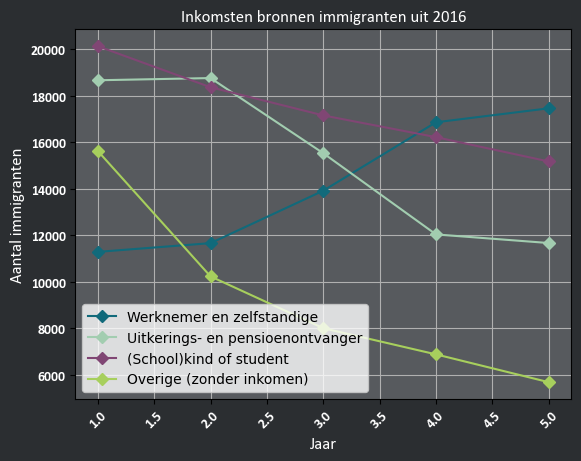

In [14]:
inkomsten_immigranten.plot(kind='line',  marker= 'D', color=colors)

plt.title('Inkomsten bronnen immigranten uit 2016', fontsize=12, fontname='Calibri', color='white')
plt.xlabel('Jaar', fontsize=12, fontname='Calibri', color='white')
plt.ylabel('Aantal immigranten', fontsize=12, fontname='Calibri', color='white')

ax = plt.gca()
ax.set_facecolor('#575a5e') 

fig = plt.gcf() 
fig.patch.set_facecolor('#2b2e31')

plt.grid(True)

plt.xticks(rotation=45, color='white')

plt.legend(fontsize=10, facecolor='white')
plt.setp(plt.legend().get_texts(), color='black')

plt.xticks(fontsize=10, fontname='Calibri', color='white', weight='bold')
plt.yticks(fontsize=10, fontname='Calibri', color='white', weight='bold')

plt.show()

### Figuur 4

Figuur 4 laat het percentage mensen zien die zich wel eens onveilig hebben gevoeld in Nederland. Het is een sterk dalende grafiek naarmate het naar het jaar 2019 gaat. Er mist echter wel een datapunt in 2018 omdat er geen meting toen is gedaan, dit is gemarkeerd met de rode lijn.

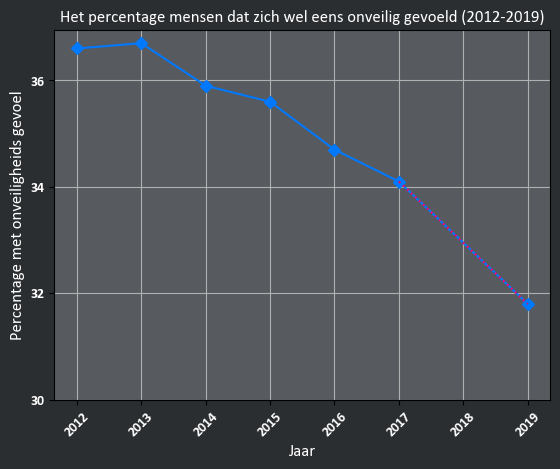

In [ ]:
index_onveilig = onveilig.index.values.astype(int)
values_onveilig = onveilig.values

plt.plot(index_onveilig, values_onveilig, marker='D', linestyle='-', color='#0079FF')
plt.plot([2017, 2019], [34.1, 31.8], linestyle=':', color='#FF0060')

plt.xlabel('Jaar', fontsize=12, fontname='Calibri', color='white')
plt.ylabel('Percentage met onveiligheids gevoel', fontsize=12, fontname='Calibri', color='white')
plt.title('Het percentage mensen dat zich wel eens onveilig gevoeld (2012-2019)', fontsize=12, fontname='Calibri', color='white')


plt.xticks(range(2012, 2020))
plt.yticks(range(30, 38, 2))

ax = plt.gca()
ax.set_facecolor('#575a5e')

fig = plt.gcf()
fig.patch.set_facecolor('#2b2e31')

plt.grid(True)

plt.xticks(rotation=45, color='white')

plt.xticks(fontsize=10, fontname='Calibri', color='white', weight='bold')
plt.yticks(fontsize=10, fontname='Calibri', color='white', weight='bold')

plt.show()


### Figuur 5

Figuur 5 laat de migratiemotieven of redenen zien van immigranten die naar Nederland komen zonder een Nederlands achtergrond in 2015. Het grootste percentage immigreert om bij hun gezin te zijn. 23,6 procent immigreert om te werken in Nederland. Verder is er 20,9 procent die asiel heeft gezocht in Nederland en het kleinste percentage immigranten die naar Nederland komen, komen om te studeren.

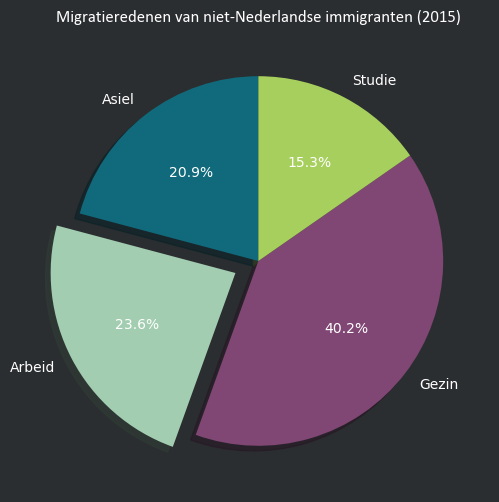

In [ ]:
plt.figure(figsize=(10,6))

textprops = {'color': 'white', 'fontsize': 10} 
explode = [0, 0.14, 0, 0] 
shadow = True
startangle = 90

plt.pie(laatste_data, labels=laatste_data.index, autopct='%1.1f%%', colors=colors, textprops=textprops, explode=explode, shadow=shadow, startangle=startangle)
plt.title('Migratieredenen van niet-Nederlandse immigranten (2015)', fontsize=12, fontname='Calibri', color='white')

ax = plt.gca() 
ax.set_facecolor('#575a5e')

fig = plt.gcf()
fig.patch.set_facecolor('#2b2e31')


plt.show()

### Figuur 6

Figuur 6 laat het aantal verdachten en het aantal immigranten zien die in Nederland zijn tot 2022. Daarnaast laat het ook de verdachten met een Nederlands achtergrond en verdachten met een immigratie achtergrond zien. Je kunt door deze grafiek een vergelijking doen tussen de komst van migranten en het aantal groeiende of dalende verdachten in Nederland met een migratie achtergrond.

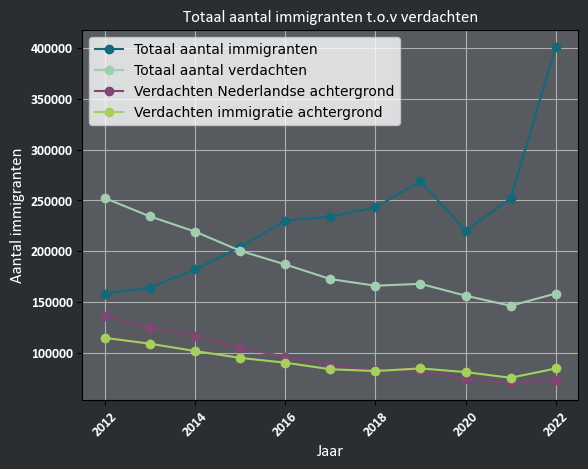

In [ ]:
result.plot(kind='line',  marker= 'o', color=colors)

# Set the plot title and labels
plt.title('Totaal aantal immigranten t.o.v verdachten', fontsize=12, fontname='Calibri', color='white')
plt.xlabel('Jaar', fontsize=12, fontname='Calibri', color='white')
plt.ylabel('Aantal immigranten', fontsize=12, fontname='Calibri', color='white')
plt.legend(['Totaal aantal immigranten', 'Totaal aantal verdachten', 'Verdachten Nederlandse achtergrond', 'Verdachten immigratie achtergrond'],loc='upper left')


ax = plt.gca()  # Get the current axes
ax.set_facecolor('#575a5e')  # Set the background color of the graph

fig = plt.gcf()  # Get the current figure
fig.patch.set_facecolor('#2b2e31')

plt.grid(True)

plt.xticks(rotation=45, color='white')

plt.xticks(fontsize=10, fontname='Calibri', color='white', weight='bold')
plt.yticks(fontsize=10, fontname='Calibri', color='white', weight='bold')

# Display the plot
plt.show()

### Figuur 7

Figuur 7 laat het BBP van Nederland en Denemarken zien in vergelijking met elkaar vanaf 2004 tot 2021. De x-as laat het huidige BBP in US dollars($) zien van dat jaar, en de y-as laat de jaren zien. Hier is te zien dat Nederland jaarlijks (meer dan) het dubbele in BBP heeft ten opzichte van Denemarken.

In [23]:
bar1 = go.Bar(
    x= denmark_df['Year'],
    y= denmark_df['Value'],
    name = 'Denemarken',
    marker = dict(color='rgb(186,19,19)')
)

bar2 = go.Bar(
    x = netherlands_df['Year'],
    y = netherlands_df['Value'],
    name = 'Nederland',
    marker=dict(color='rgb(255,148,65)'),
)

group = [bar1, bar2]
group_layout = go.Layout(    
    xaxis=go.layout.XAxis(
        type = 'category', 
        title = 'Jaar',
#         tickangle = 90
    ),
    yaxis = go.layout.YAxis(
        #tickformat = ',.0%', 
        title = 'BBP (huidige US$)'
    ),
    
    barmode = 'group',
    title = 'BBP van Nederland en Denemarken',
    title_x = 0.5
)

fig = go.Figure(data=group, layout=group_layout)
fig.show()

# **Perspectieven** 

### *Perspectief 1 (maatschappelijk):* Door de toename van het aantal inkomende migranten, stijgt ook het aantal criminelen met migratieachtergrond in Nederland.

We zien in de barplot van figuur 1 dat in het jaar 2019 en het jaar 2022 de meeste migranten naar Nederland komen, daarbij zien we in de linechart van figuur 2 dat er een toename is van het totaal aantal geregistreerde verdachten tijdens deze jaartallen. Verder passeert het aantal geregistreerde verdachten met een migratieachtergrond de verdachten met Nederlandse achtergrond in 2019. En bovendien is de toename van de verdachten met migratieachtergrond in 2022 significant groter dan die van met Nederlandse achtergrond (zie figuur 6)

- **Weerlegging 1:** Aan de andere kant neemt het totaal aantal migranten toe in Nederland, maar daalt het totaal aantal geregistreerde verdachten.

Er is duidelijk een negatieve correlatie tussen het aantal inkomende migranten in Nederland en het aantal geregistreerde verdachten in Nederland. De trend van inkomende migranten neemt toe en de trend van het aantal verdachten neemt af.

- **Weerlegging 2:** Migranten zorgen niet voor een onveiliger Nederland

In de grafiek over het onveiligheidsgevoel van Nederlanders (figuur 4), is te zien dat het percentage van mensen die zich wel eens onveilig voelt ieder jaar daalt. Als dit vergeleken wordt met het inkomende aantal migranten ieder jaar (figuur 1), is te zien dat het toenemende aantal migranten geen effect heeft op het onveiligheids gevoel van Nederlanders. 

### *Perspectief 2 (economisch):* Migranten zorgen niet voor een afname, danwel voor een toename van de welvaart in Nederland. 

In figuur 3 kan er afgelezen worden dat de inkomsten van migranten aanvankelijk bestond uit een uitkering op het moment dat ze migreerden naar Nederland. Naarmate ze langer in Nederland blijven neemt het aantal migranten die werken voor een baas en/of  zelfstandig bezig zijn toe. Ook is er een grote afname van het aantal uitkeuringen die verstrekt wordt aan migranten. Deze beiden constateringen zorgen voor een hogere arbeidsparticipatie. Een groter aantal werkenden kan leiden tot een verhoogde productie en economische groei. Verder is er een vermindering van de sociale uitgaven. Wanneer het aantal mensen met een uitkering afneemt, worden de kosten hiervoor dus ook minder. Dit kan de druk op de overheidsbegroting verlichten en zo hun middelen op andere belangrijke sectoren inzetten zoals bijvoorbeeld onderwijs. Op basis van deze onderbouwingen kan geconcludeerd worden dat de komst van migranten zorgt voor een toename van de welvaart in Nederland. 

Verder laat de grafiek over de migratieredenen van migranten in 2015 (figuur 5), zien dat een groot gedeelte van de migranten voor arbeid én voor studie komt. Hieruit kan er opgemaakt worden dat veel migranten juist bijdragen aan een betere welvaart van Nederland. De huidige migratie ten behoeve van arbeid laat zien hoe aantrekkelijk de arbeidsmarkt in Nederland is, vooral in bepaalde sectoren die essentieel zijn voor de economie van het land. Het toont aan dat Nederland internationaal talent en werknemers aantrekt die anders naar een ander land waren gegaan. Deze mensen betalen belastingen, verhogen het bruto binnenlands product en dragen op veel andere manieren bij aan de welvaart van het land. 


### *Perspectief 3:* Migranten hebben geen effect op het BBP van het land waar de migranten heen gaan. (Denemarken VS Nederland)

Denemarken heeft een omstreden migratiebeleid die totaal anders is dan die van Nederland. Het land heeft een strenge regeling waarbij er amper migranten binnenkomen (Eerdmans, 2021). In Nederland daarentegen is dit niet het geval. Nederland heeft een veel soepelere regeling, wat goed terug te zien is in de grafiek over inkomende migranten (figuur 1).  
In de grafiek over het BBP van Nederland en Denemarken (figuur 7), kan er afgelezen worden dat de trend van beide landen redelijk gelijk lopen. Als het BBP van Nederland stijgt, stijgt die van Denemarken ook. En als dit vergeleken wordt met de inkomende migranten stroom, is er bijna geen verschil tussen beide landen. Dus ondanks dat Nederland een flink aantal migranten opneemt, blijft haar BBP in dezelfde trend stijgen ten opzichten van Denemarken.




# Conclusie

Op basis van de voorgestelde argumenten en weerleggingen kan worden geconcludeerd dat er geen eenduidige relatie bestaat tussen de instroom van migranten en criminaliteit in Nederland. Hoewel de gegevens een toename laten zien van geregistreerde verdachten met een migratieachtergrond, suggereren andere gegevens een daling van het totaal aantal geregistreerde verdachten en een verminderd gevoel van onveiligheid, ondanks een toename van de migranten in Nederland.

Bovendien lijkt de instroom van migranten niet negatief bij te dragen aan de welvaart van het land, en kan zelfs worden geconcludeerd dat migranten mogelijk bijdragen aan de economische groei van Nederland. Dit is onderbouwd door de toename van de arbeidsparticipatie van migranten, de afname van uitkeringen onder migranten, en de stijging van de gemiddelde inkomens ondanks de groei van het aantal migranten.

Trends over de tijd en internationale vergelijkingen, zoals de vergelijking met Denemarken, suggereren dat er andere factoren zijn die een grotere invloed hebben op zowel criminaliteitsniveaus als economische welvaart dan migratie alleen.

# Feedback 

Nadat wij onze presentatie gaven op 22 juni hebben wij hier nuttige feedback over gekregen. De volgende punten gaven de andere studenten en TA terug als feedback:
- verdachten in percentage nemen van het totaal aantal inwoners
- inkomsten van immigranten vergelijken met bbp van nederland
- ander land vergelijken met strict immigratiebeleid

Het eerste punt gaat over de grafiek waarin het aantal geregistreerde verdachten met nederlandse achtergrond wordt vergeleken met die van een migratieachtergrond. Deze grafiek laat de absolute waardes zien van het aantal verdachten. Echter, leven er veel meer Nederlanders in Nederland dan mensen met een migratieachtergrond. Het verschil lijkt in de grafiek niet significant, maar wanneer dit in percentage wordt genomen met het totaal aantal inwoners dan wordt dit verschil een stuk groter. 
Nadat we deze feedback hebben ontvangen zijn we opzoek gegaan naar een dataset met het aantal migranten in Nederland zodat we dit als percentage konden nemen. Echter is dit niet gelukt, omdat er nergens zo'n dataset gevonden kan worden.

Het tweede punt gaat over het vergelijken van de inkomsten van migranten met het bbp van inwoners. Misschien dat er een trend is dat migranten steeds meer gaan verdienen in de komende jaren ten opzichte van het gemiddeld inkomen van Nederlanders. Dit leek ons in eerste instantie een goed idee, maar na overleg hebben we besloten dit niet te doen. Wij denken dat dit te weinig zegt om iets toe te voegen aan onze onderzoeksvraag. 

Voor het laatste punt werd voorgesteld om een land met een strict migratiebeleid te vergelijken met Nederland (die een soepel migratiebeleid heeft). We willen dan het bbp vergelijken en misschien aantonen dat het bbp toeneemt naarmate Nederland meer migranten binnenkrijgt. We hebben een dataset gevonden op github die het bbp weergeeft per land per jaar, hieruit hebben we Denemarken en Nederland gepakt. 


# Logboek

In [ ]:
logboek = pd.read_csv('logboek.csv', delimiter=';')
pd.set_option('display.max_colwidth', None)
logboek = logboek.set_index('Datum')

display(logboek)

,Activiteit,Uren,Kerem,Mert,Roman,Probleem & Oplossingen
Datum,,,,,,
6-6-2023,Werken aan de wekelijkse opdrachten,2,Individueel,Individueel,Individueel,In de eerste week zaten wij tijdens de werkcolleges te werken aan de wekelijkse opdracht.
8-6-2023,Werken aan de wekelijkse opdrachten,2,Individueel,Individueel,Individueel,In de eerste week zaten wij tijdens de werkcolleges te werken aan de wekelijkse opdracht.
13-6-2023,Onderzoeksvraag bedenken & Datasets zoeken,2,Gezamenlijk,Gezamenlijk,Gezamenlijk,In deze college zijn wij begonnen met het bedenken van onze onderzoeksvraag en zijn wij datasets gaan zoeken die onze ondersvraag zouden kunnen ondersteunen en weerleggen.
15-6-2023,Datasets zoeken,3,Gezamenlijk,Gezamenlijk,Gezamenlijk,In deze college zijn wij datasets gaan zoeken die onze ondersvraag zouden kunnen ondersteunen en weerleggen.
20-6-2023,Onderzoeksvraag veranderen en nieuwe datasets zoeken,4,Gezamenlijk,Gezamenlijk,Gezamenlijk,We kwamen er achter dat onze onderzoeksvraag niet goed genoeg was en besloten wij een andere onderzoeksvraag te vinden en er datasets bij te vinden.
22-6-2023,Datasets zoeken & Preporcessen en beginnen aan onze onderzoek/Presenteren,3,Argumentaties beargumteren & weerleggen/Plotten,Presenteren/Preprocessen/Plotten,Presenteren/Argumentaties beargumteren & weerleggen/Preprocessen/Plotten,Hier hebben we datasets gevonden en hebben zijn wij begonnen aan de preproccsing om de plots te kunnen visualiseren.
27-6-2023,Onderzoek aan het afronden,4,Laatste aanpassingen doorvoeren,Laatste aanpassingen doorvoeren,Laatste aanpassingen doorvoeren,We hebben onze data gevisualiseerd en hebben onze argumenten hiermee kunnen onderbouwen.
29-6-2023,Laatste aanpassingen aan het uitvoeren op onze onderzoek,2,Laatste aanpassingen doorvoeren,Laatste aanpassingen doorvoeren,Alle delen van het onderzoek samenstellen/laatste aanpassingen doorvoeren,De laatste puntjes zijn op de 'i' gezet en hebben onze onderzoek afgerond.


# Bronvermelding

- Eerdmans, J. (2021, 18 juni). Deens migratiebeleid is allesbehalve inhumaan of xenofoob. NRC. https://www.nrc.nl/nieuws/2021/06/17/deens-migratiebeleid-is-juist-een-voorbeeld-voor-nederland-a4047709#/handelsblad/2021/06/18/#118